In [1]:
import os
import sys
import numpy as np

base = os.path.expanduser('~/GoogleDrive/Bonn/programming_lab_2/handout05')

# Matricies in Python

## Exercise 1

In [2]:
n = 3
m = 3

In [3]:
row = [0] * n
matrix = []

for i in range(m):
    matrix.append(row)

matrix

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [4]:
matrix[0][1] = 3
matrix

[[0, 3, 0], [0, 3, 0], [0, 3, 0]]

Appending the same row object multiple times doesn't work because it's actaully apppending a pointer to the original matrix. In python, everything is passed by reference. A modification to one position in this matrix will result in a change in all of them. A solution is to use the `copy` method, while also considering how deep the copy is.

In [5]:
row = [0] * n
matrix = []

for i in range(m):
    matrix.append(row.copy())

matrix

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [6]:
matrix[0][1] = 3
matrix

[[0, 3, 0], [0, 0, 0], [0, 0, 0]]

## Exercise 2

In [7]:
dict_matrix = {}
from itertools import product

for x, (i, j) in enumerate(product(range(n), range(m))):
    dict_matrix[i, j] = x
        
dict_matrix

{(0, 0): 0,
 (0, 1): 1,
 (0, 2): 2,
 (1, 0): 3,
 (1, 1): 4,
 (1, 2): 5,
 (2, 0): 6,
 (2, 1): 7,
 (2, 2): 8}

# The Numpy Package

## Exercise 3

Consider that edge cases are hard to match.

In [8]:
def dotplot(seqA, seqB, w=1, s=1):
    """
    :param seqA: character sequence A
    :param seqB: character sequence B
    :param w: the window side
    :param s: the stringency
    """
    assert 0 < w and w % 2 != 0, 'window size should be positive odd'
    assert 0 < s <= w
    
    offset = (w - 1) // 2
    
    al, bl = len(seqA), len(seqB)
    dp = np.zeros(shape=(al, bl), dtype=int)
    
    for i in range(al):
        for j in range(bl):
            for k in range(-offset, offset + 1):
                if 0 <= i + k < al and 0 <= j + k < bl and seqA[i + k] == seqB[j + k]:
                    dp[i, j] += 1
    return dp >= s


ex_seqA, ex_seqB = 'WINDQWS', 'WQNDERS'
ex_dp = dotplot(ex_seqA, ex_seqB, w=1, s=1)

ex_dp

array([[ True, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False,  True, False, False, False, False],
       [False, False, False,  True, False, False, False],
       [False,  True, False, False, False, False, False],
       [ True, False, False, False, False, False, False],
       [False, False, False, False, False, False,  True]], dtype=bool)

## Exercise 4

In [9]:
def dotplot2ascii(dp, seqA, seqB, heading=None, file=sys.stdout):
    if heading:
        print('{}\n'.format(heading), file=file)
    print("  {}".format(seqB), file=file)
    print(' ', '-' * len(seqB), file=file)
    for i, c in enumerate(seqA):
        print("{}|{}".format(c, ''.join('*' if x else ' ' for x in dp[i])), file=file)
        
ex2_seq = 'ABRACADABRACADABRA'
ex2_dp = dotplot(ex2_seq, ex2_seq, w=1, s=1)
dotplot2ascii(ex2_dp, ex2_seq, ex2_seq, heading='')

  ABRACADABRACADABRA
  ------------------
A|*  * * *  * * *  *
B| *      *      *  
R|  *      *      * 
A|*  * * *  * * *  *
C|    *      *      
A|*  * * *  * * *  *
D|      *      *    
A|*  * * *  * * *  *
B| *      *      *  
R|  *      *      * 
A|*  * * *  * * *  *
C|    *      *      
A|*  * * *  * * *  *
D|      *      *    
A|*  * * *  * * *  *
B| *      *      *  
R|  *      *      * 
A|*  * * *  * * *  *


In [10]:
dotplot2ascii(ex_dp, ex_seqA, ex_seqB, heading='Example ASCII')

Example ASCII

  WQNDERS
  -------
W|*      
I|       
N|  *    
D|   *   
Q| *     
W|*      
S|      *


In [11]:
dotplot2ascii(dotplot(ex_seqA, ex_seqB, w=3, s=2), ex_seqA, ex_seqB, heading='Example 2: NDQ and NDE Matches')

Example 2: NDQ and NDE Matches

  WQNDERS
  -------
W|       
I| *     
N|  *    
D|   *   
Q|       
W|       
S|       


In [12]:
dotplot2ascii(dotplot(ex_seqA, ex_seqB, w=5, s=3), ex_seqA, ex_seqB, heading='Example 3: No D-D match')

Example 3: No D-D match

  WQNDERS
  -------
W|       
I| *     
N|  *    
D|       
Q|    *  
W|       
S|       


In [13]:
dotplot2ascii(dotplot(ex_seqA, ex_seqB, w=7, s=4), ex_seqA, ex_seqB, heading='Example 4: Only D-D Match')

Example 4: Only D-D Match

  WQNDERS
  -------
W|       
I|       
N|       
D|   *   
Q|       
W|       
S|       


## Exercise 5

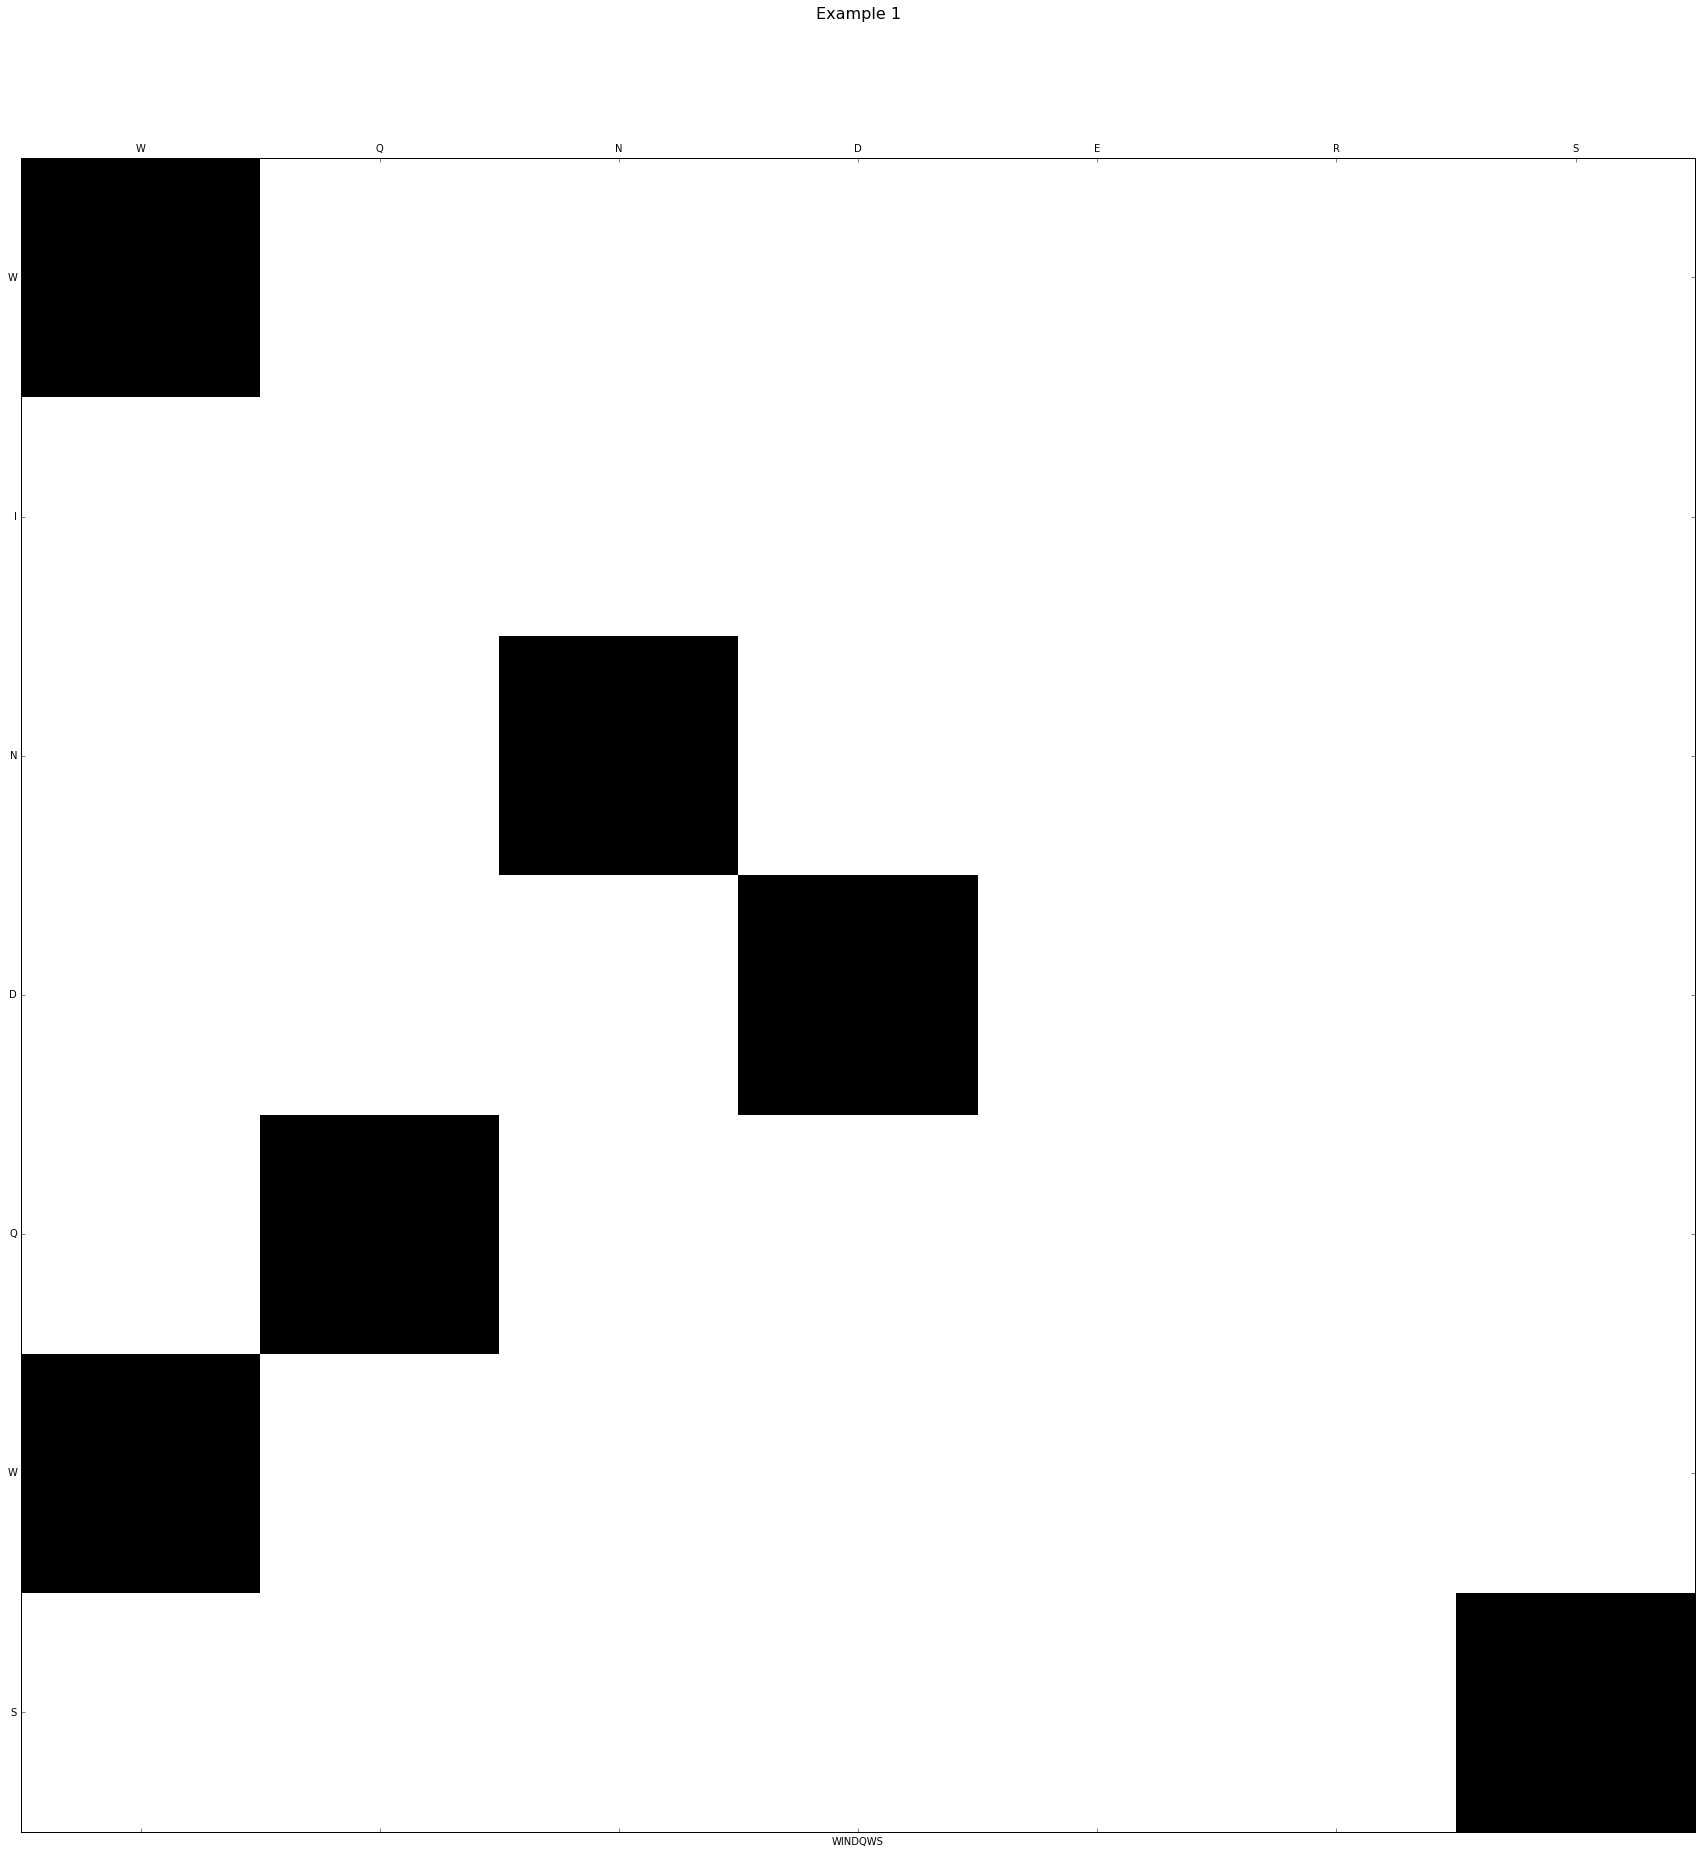

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

def dotplot2Graphics(dp, seqA, seqB, heading='', xlab=None, ylab=None, filename=None):
    fs = 30, 30#len(seqA) // 4 + 1, len(seqB) // 4 + 1
    fig = plt.figure(figsize=fs)
    ax = fig.add_subplot(111)
    ax.matshow(dp, cmap='Greys')
    ax.set_xticks(np.arange(len(seqB)))
    ax.set_xticklabels(seqB)
    ax.set_yticks(np.arange(len(seqA)))
    ax.set_yticklabels(seqA)
    if xlab:
        ax.set_xlabel(xlab)
    if heading:
        ax.set_title(heading, y=1.08, fontsize='16')
    if filename:
        fig.savefig(filename)

dotplot2Graphics(ex_dp, ex_seqA, ex_seqB, heading="Example 1", xlab=ex_seqA, ylab=ex_seqB, filename=os.path.join(base, 'ex1.png'))

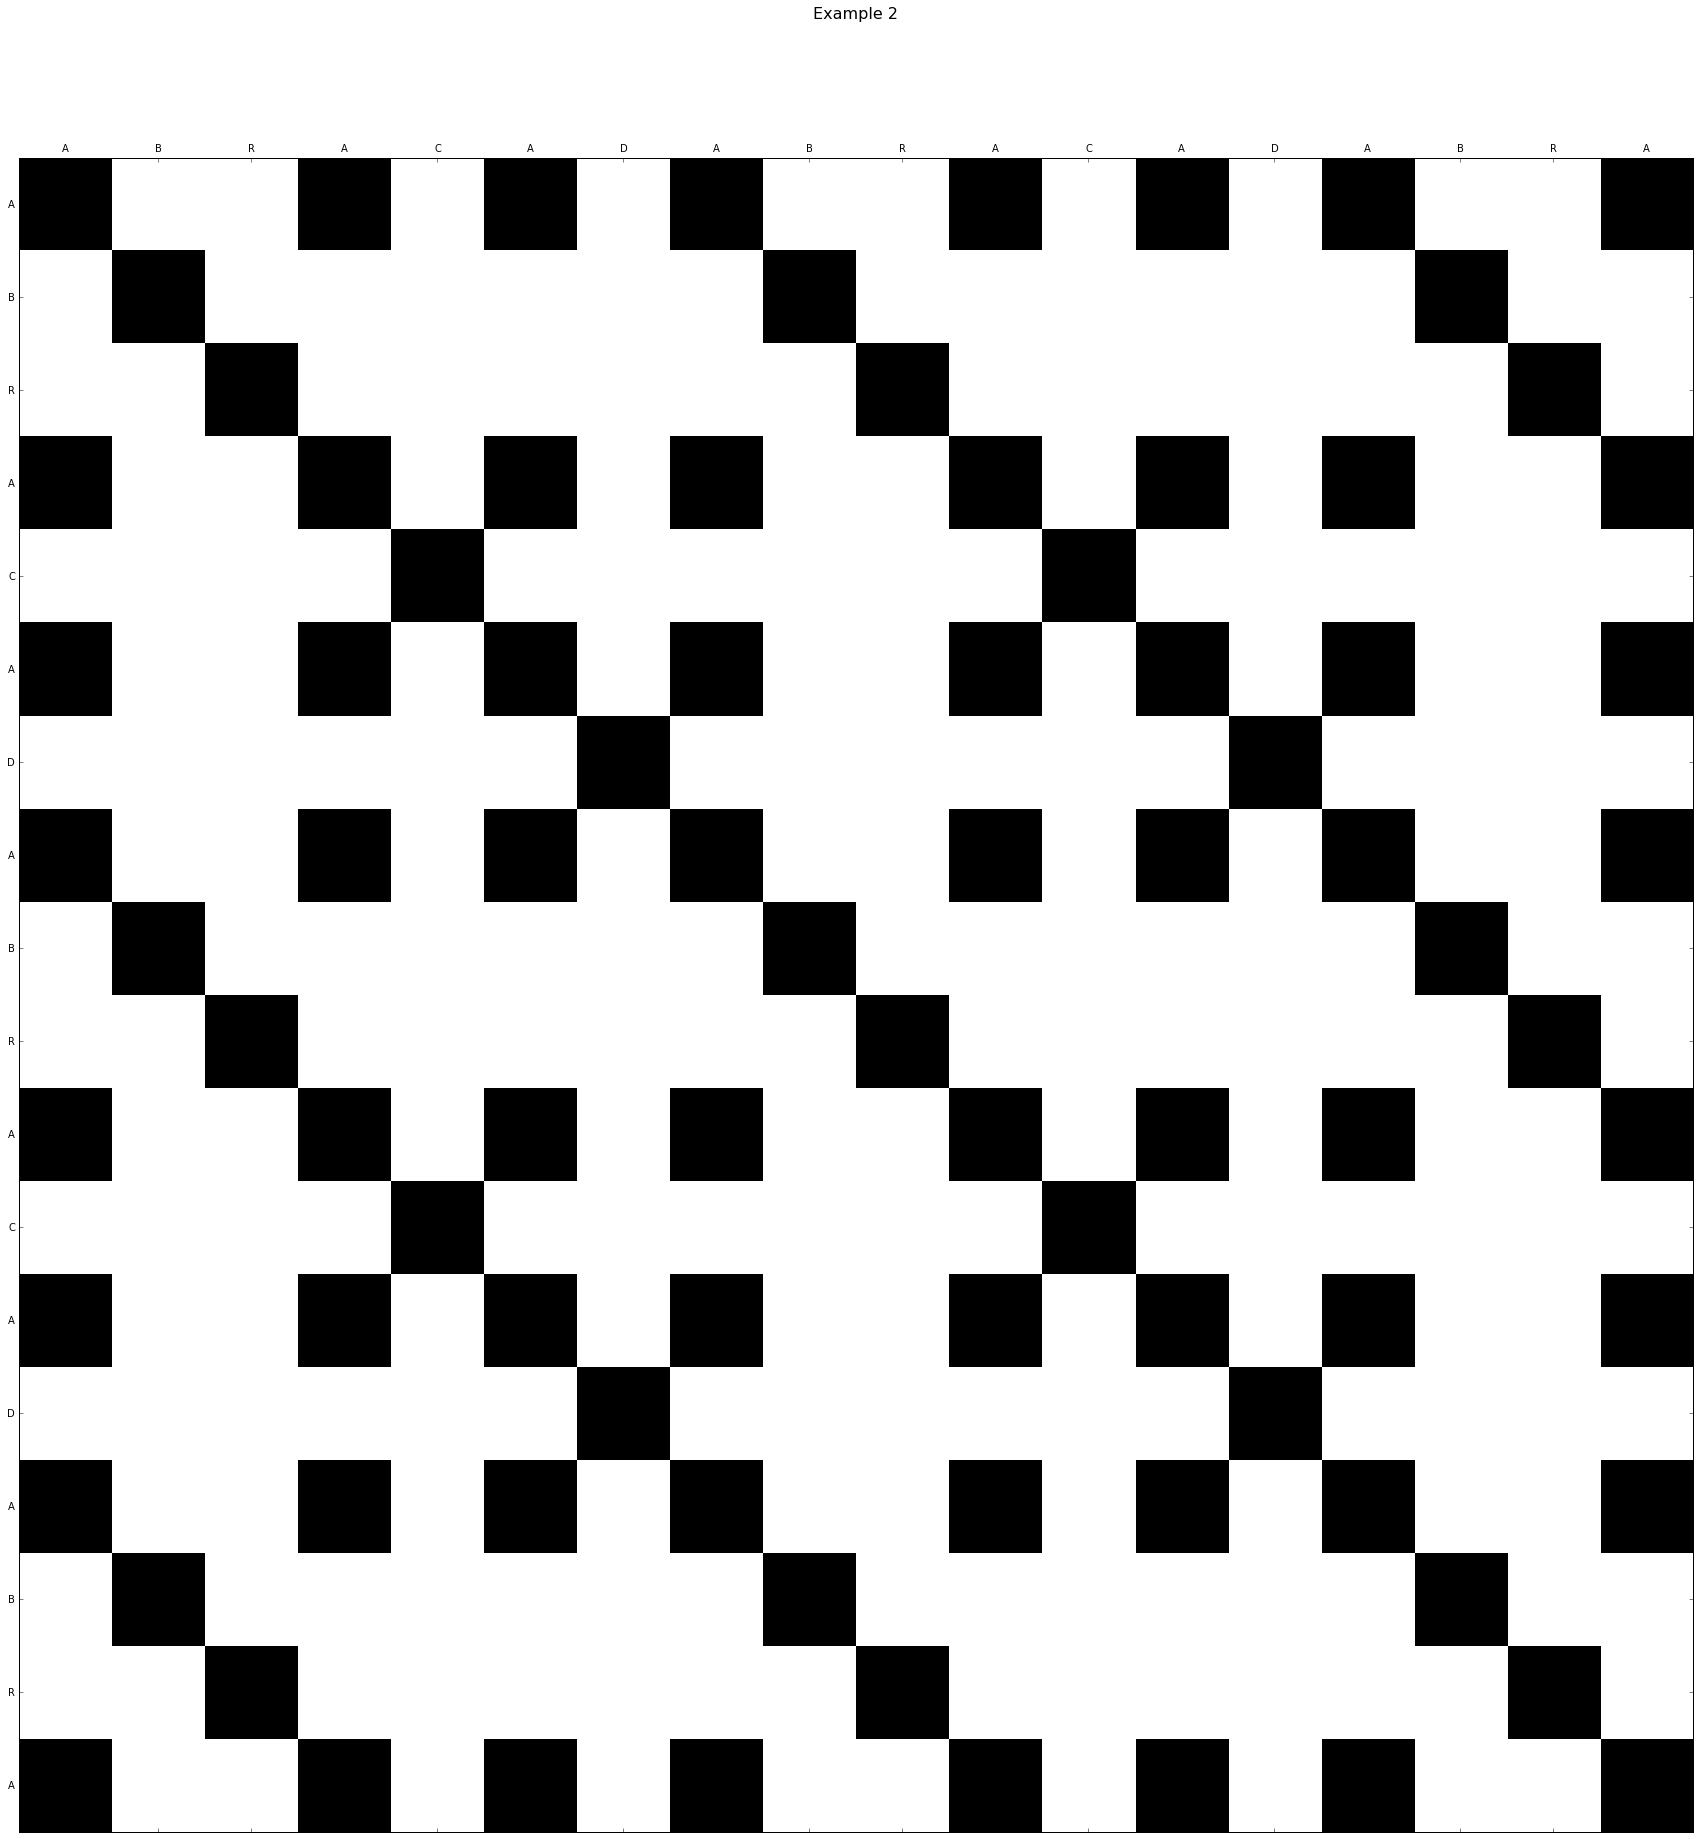

In [22]:
dotplot2Graphics(ex2_dp, ex2_seq, ex2_seq, heading="Example 2", filename=os.path.join(base, 'ex2.png'))

# Exercise 6

In [23]:
import argparse

def read_fasta_sequence(file):
    header = next(file).strip()[1:]
    rest = "".join(line.strip() for line in file)
    return header, rest

def simulate_ex6(argstring):
    parser = argparse.ArgumentParser()
    parser.add_argument('--window', '-w', type=int, default=1)
    parser.add_argument('--stringency', '-s', type=int, default=1)
    parser.add_argument('--fileA', type=argparse.FileType('r'))
    parser.add_argument('--fileB', type=argparse.FileType('r'))
    parser.add_argument('--output', '-o')
    
    args = parser.parse_args(argstring)
    
    headerA, seqA = read_fasta_sequence(args.fileA)
    headerB, seqB = read_fasta_sequence(args.fileB)
    
    dp = dotplot(seqA, seqB, w=args.window, s=args.stringency)
    
    if not args.output:
        dotplot2ascii(dp, seqA, seqB, file=sys.stdout)
    elif any(args.output.endswith(extension) for extension in ('.png', '.ps', '.pdf')):
        dotplot2Graphics(dp, seqA, seqB, filename=args.output)
    elif args.output.endswith('.txt'):
        with open(args.output, 'w') as f:
            dotplot2ascii(dp, seqA, seqB, file=f)

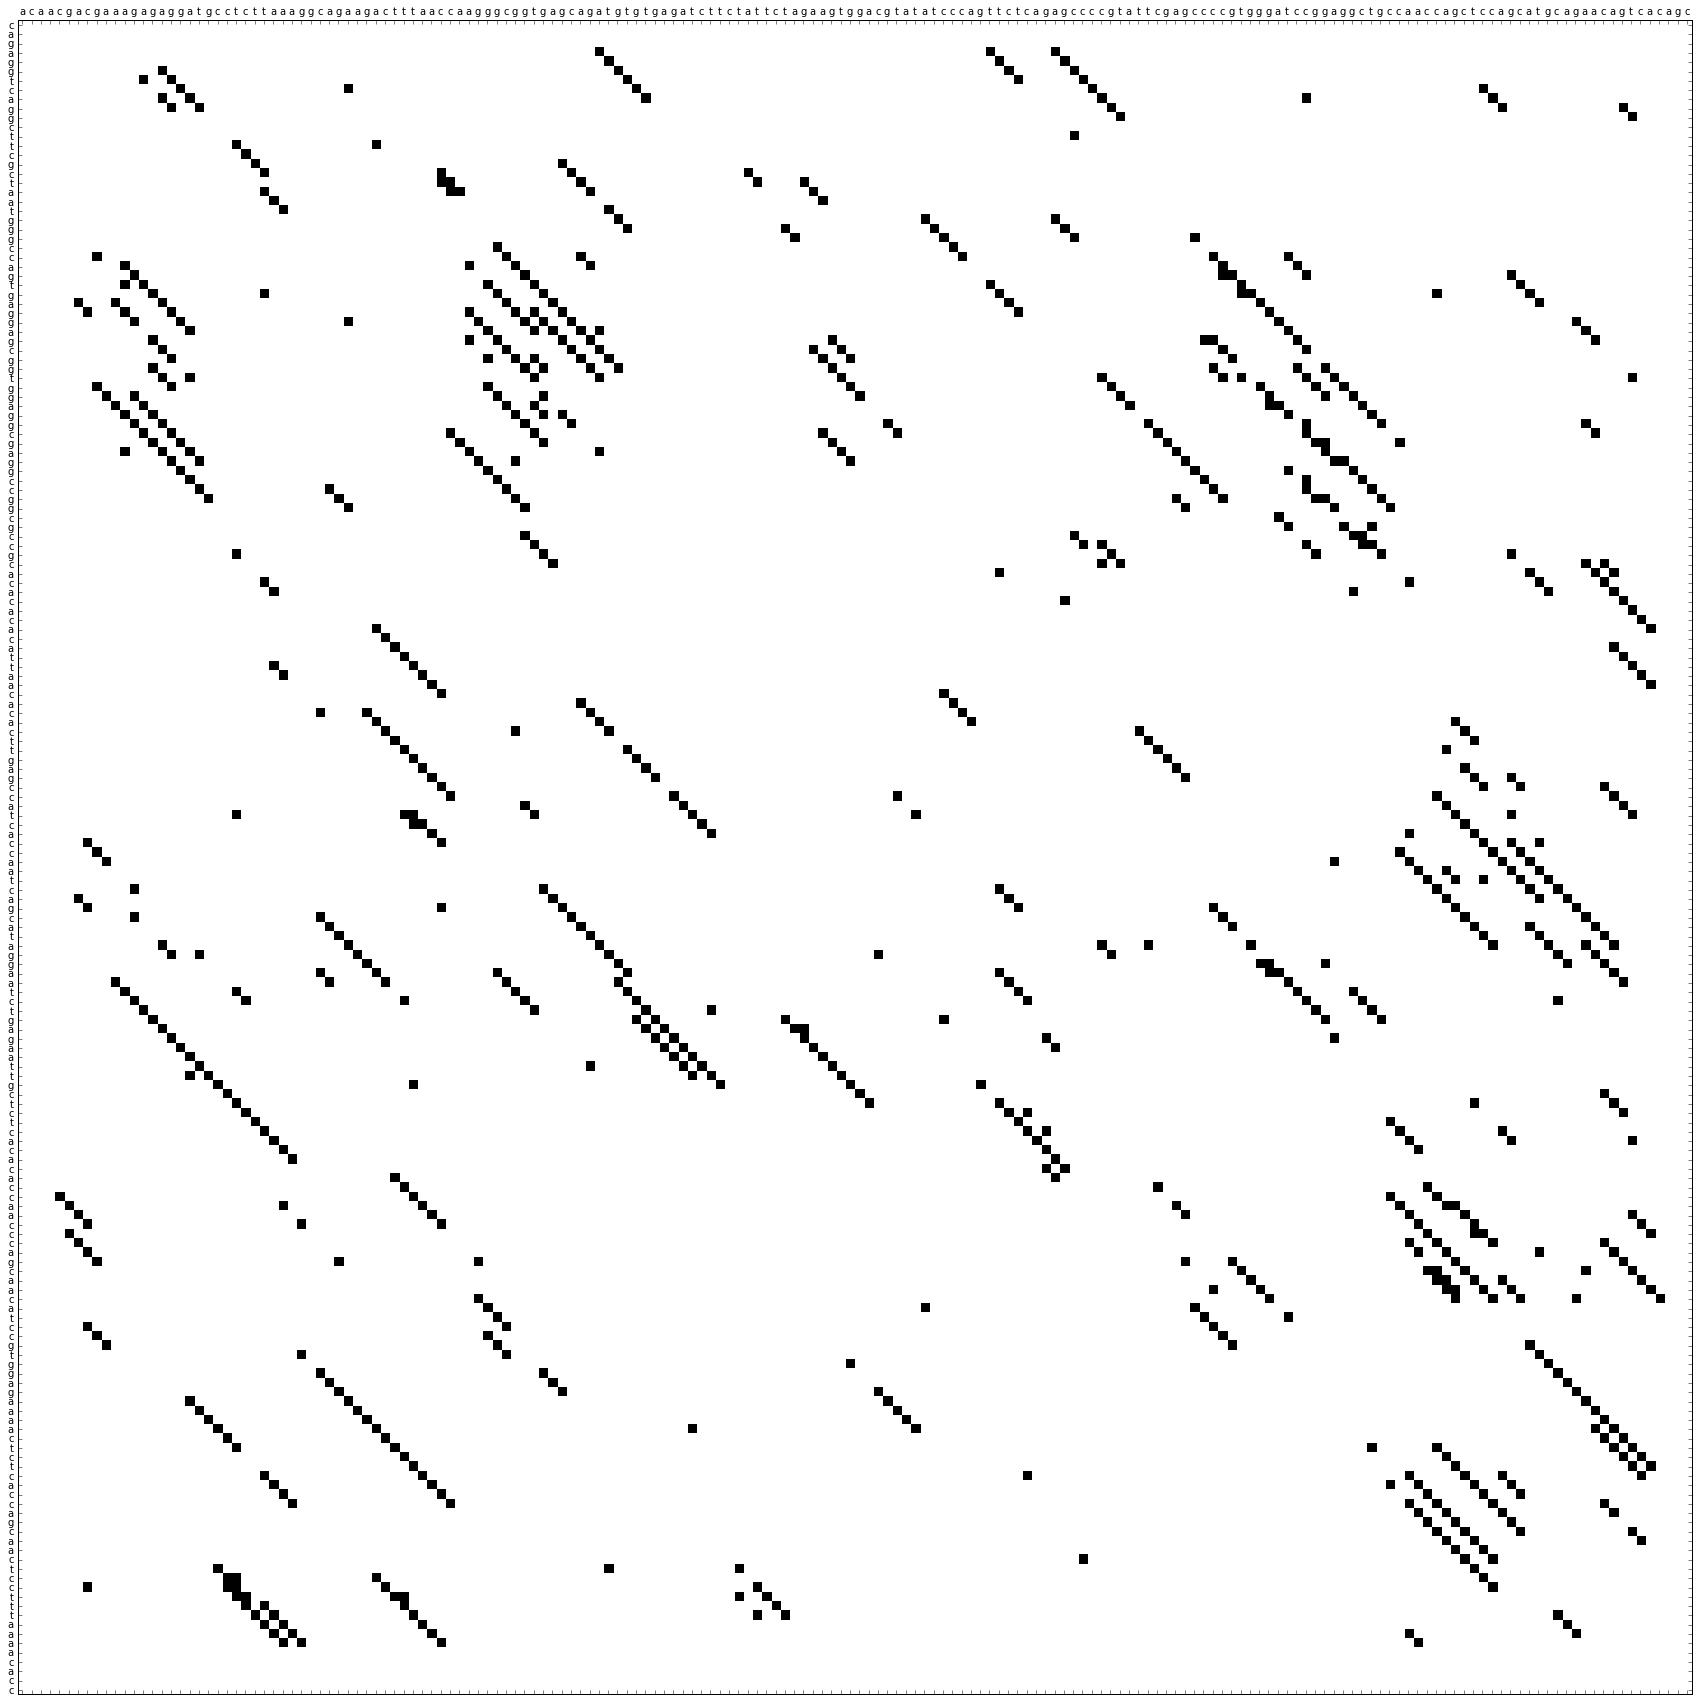

In [28]:
args = '-w {} -s {} --fileA {} --fileB {} -o {}'.format(13,
                                                        7, 
                                                        os.path.join(base, 't1.txt'), 
                                                        os.path.join(base, 't2.txt'),
                                                        os.path.join(base, 't.png'))
simulate_ex6(args.split())

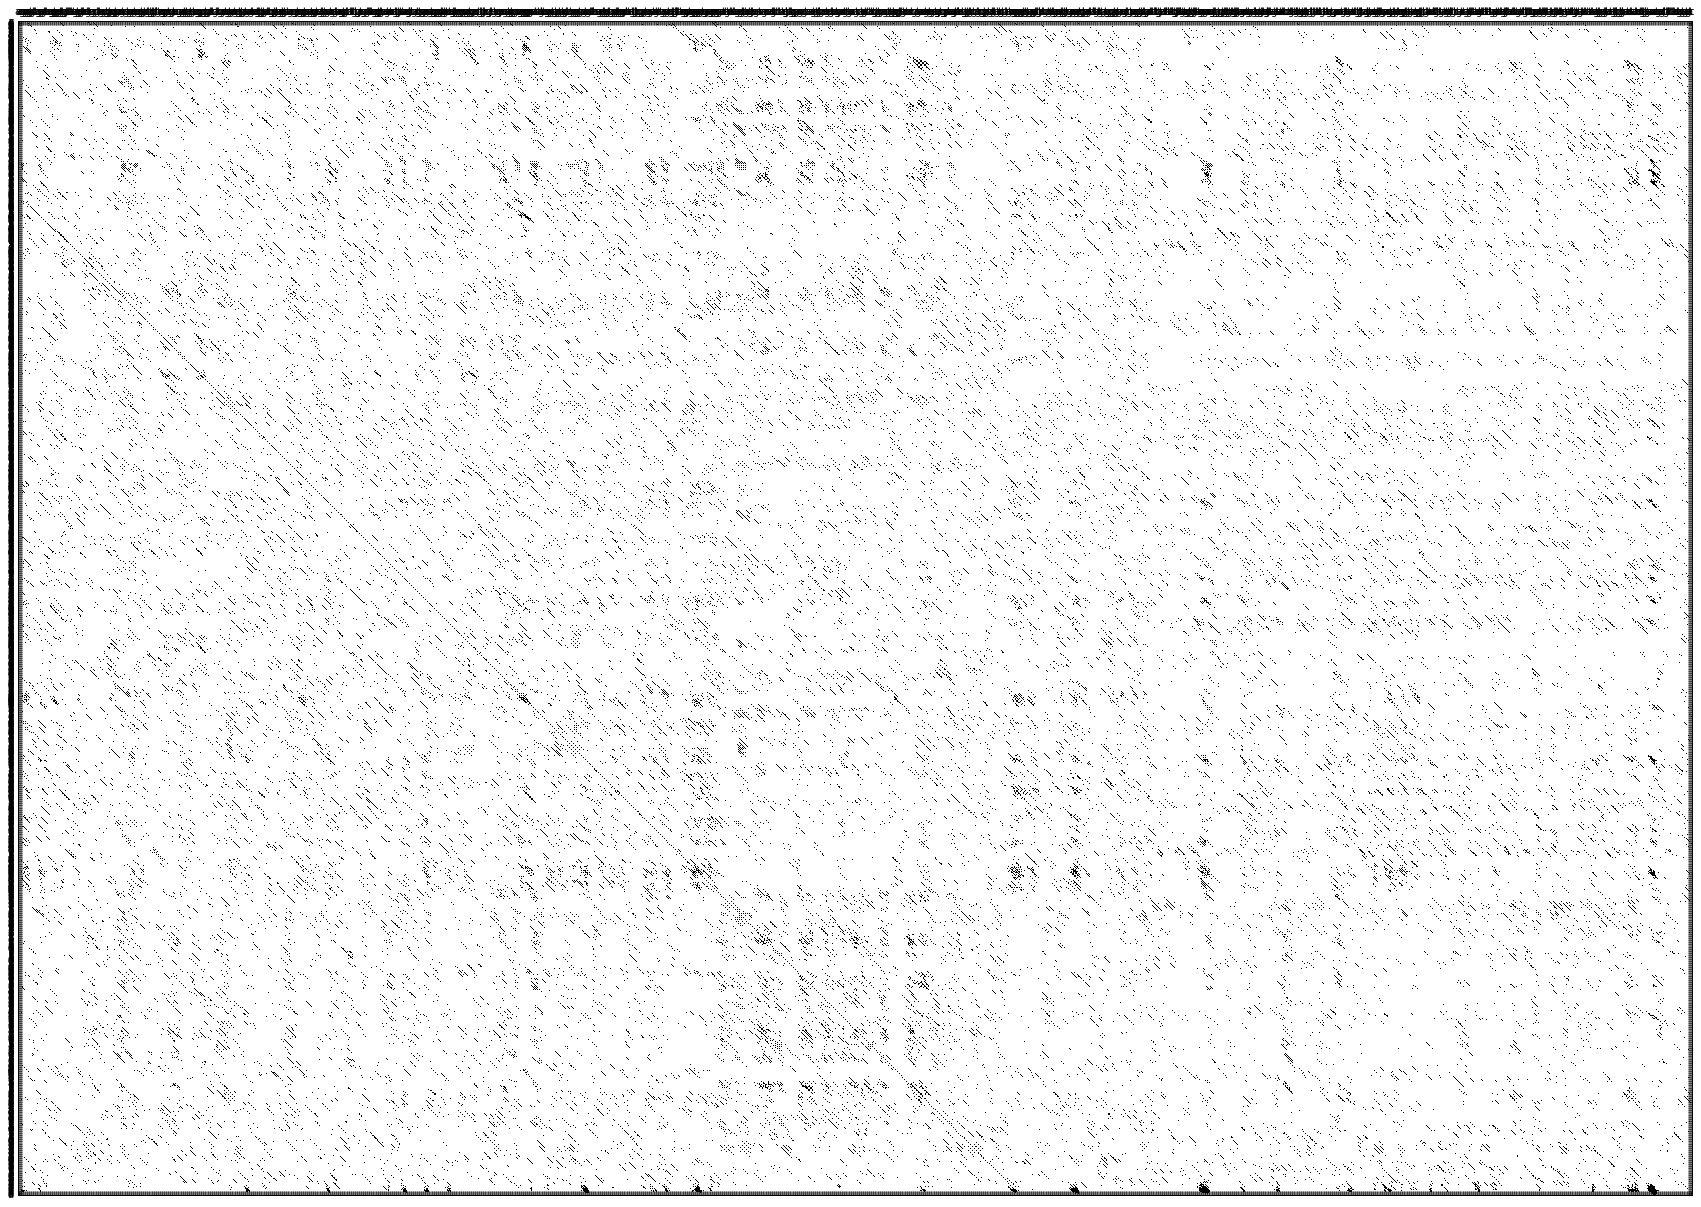

In [29]:
args = '-w {} -s {} --fileA {} --fileB {} -o {}'.format(13,
                                                        7, 
                                                        os.path.join(base, 'human_pax6_NM_001604.fasta'), 
                                                        os.path.join(base, 'mouse_pax6_NM_013627.fasta'),
                                                        os.path.join(base, 'setA-pax6.png'))
simulate_ex6(args.split())

There's one obvious alignment where almost the entire mouse pax6 gene (x axis) is a subset of the human pax6 gene (y axis)

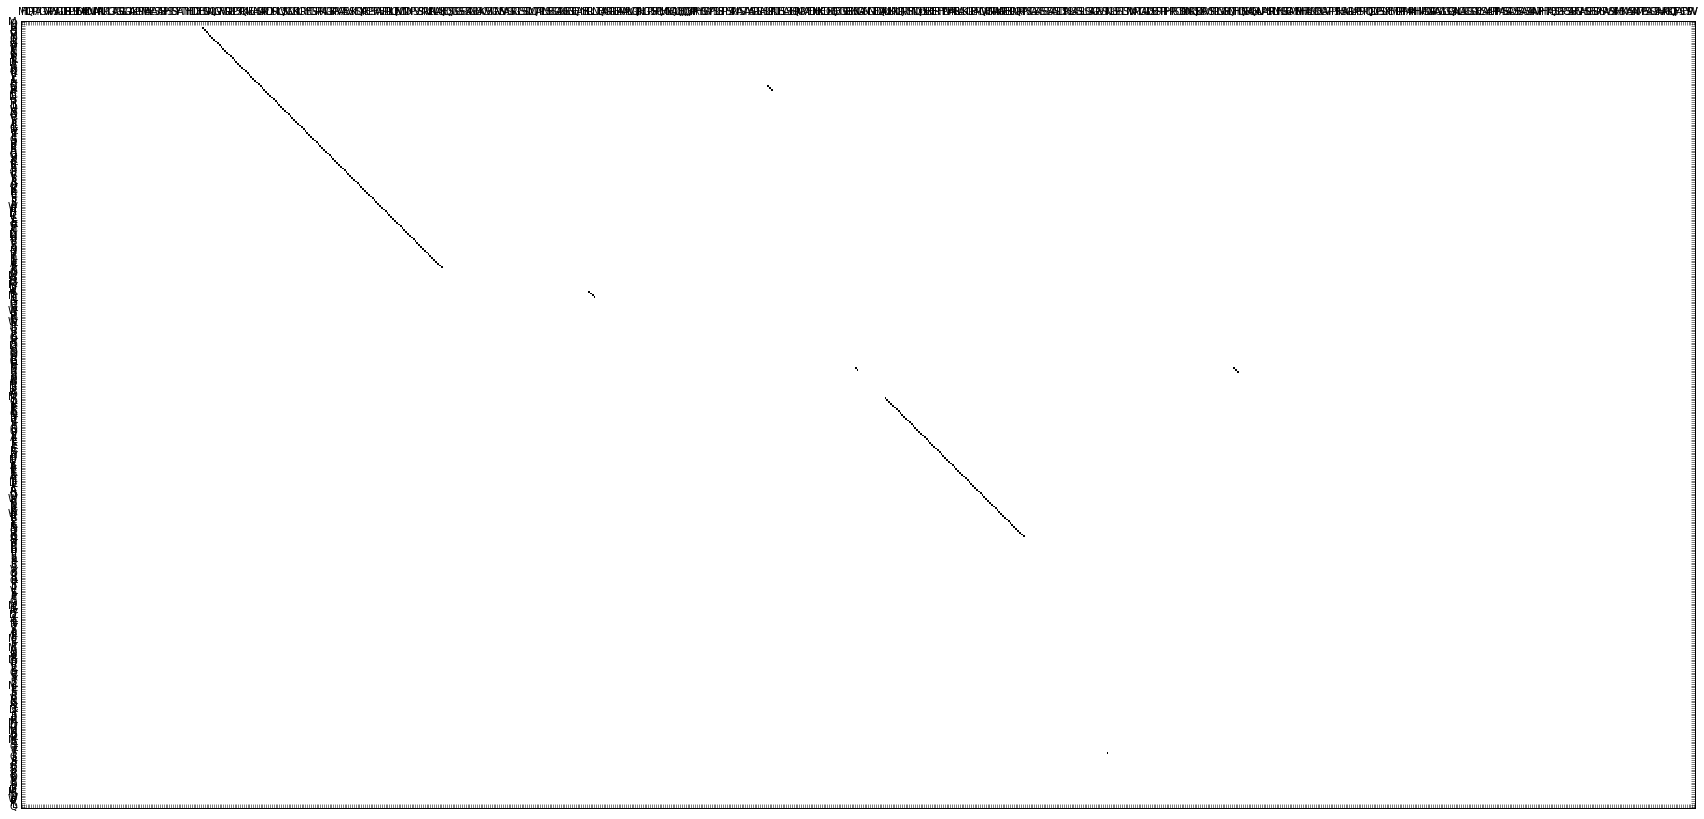

In [30]:
args = '-w {} -s {} --fileA {} --fileB {} -o {}'.format(13,
                                                        7, 
                                                        os.path.join(base, 'PAX6_HUMAN_P26367.fasta'), 
                                                        os.path.join(base, 'eyeless_NP_001014693.1.fasta'),
                                                        os.path.join(base, 'setB-eyeless.png'))
simulate_ex6(args.split())

There are two possible significant alignments over different frames, suggesting that these genes may have diverged and/or recombine

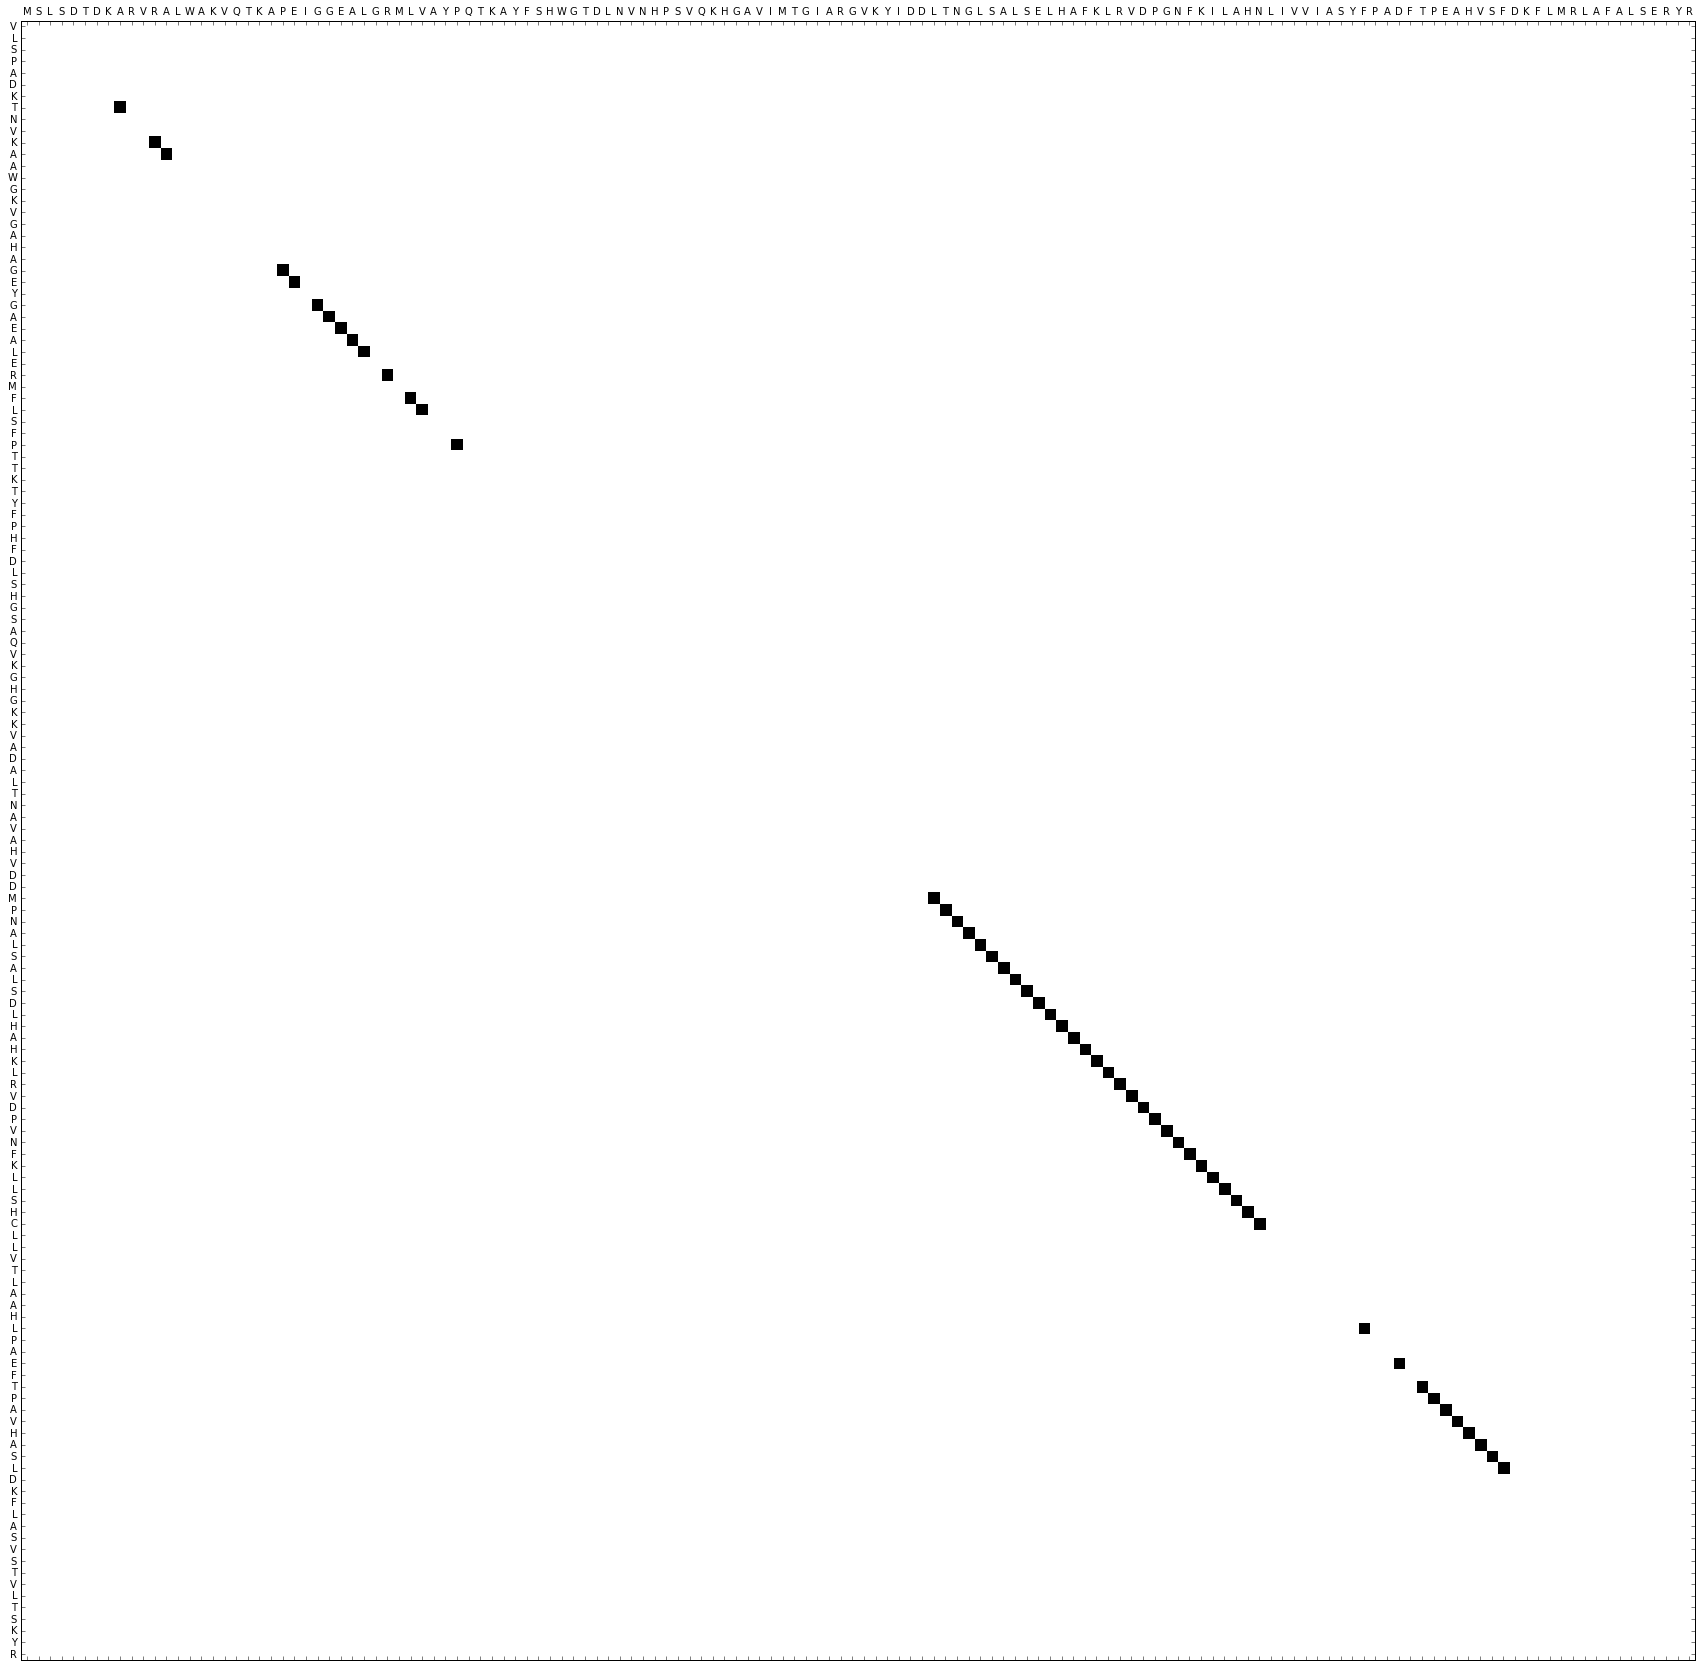

In [31]:
args = '-w {} -s {} --fileA {} --fileB {} -o {}'.format(13,
                                                        7, 
                                                        os.path.join(base, 'HBA_HUMAN_P01922.fasta'), 
                                                        os.path.join(base, 'alpha-1_globin_sparus-aurata.fasta'),
                                                        os.path.join(base, 'setC.png'))
simulate_ex6(args.split())

This match up shows only one group of overlapping regions - there's only one possible alignment. There is a lot of divergence except over a few short conserved regions. 